<a href="https://colab.research.google.com/github/afif-af/ML/blob/main/KMeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


{'Mall_Customers.csv': b'CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)\r\n1,Male,19,15,39\r\n2,Male,21,15,81\r\n3,Female,20,16,6\r\n4,Female,23,16,77\r\n5,Female,31,17,40\r\n6,Female,22,17,76\r\n7,Female,35,18,6\r\n8,Female,23,18,94\r\n9,Male,64,19,3\r\n10,Female,30,19,72\r\n11,Male,67,19,14\r\n12,Female,35,19,99\r\n13,Female,58,20,15\r\n14,Female,24,20,77\r\n15,Male,37,20,13\r\n16,Male,22,20,79\r\n17,Female,35,21,35\r\n18,Male,20,21,66\r\n19,Male,52,23,29\r\n20,Female,35,23,98\r\n21,Male,35,24,35\r\n22,Male,25,24,73\r\n23,Female,46,25,5\r\n24,Male,31,25,73\r\n25,Female,54,28,14\r\n26,Male,29,28,82\r\n27,Female,45,28,32\r\n28,Male,35,28,61\r\n29,Female,40,29,31\r\n30,Female,23,29,87\r\n31,Male,60,30,4\r\n32,Female,21,30,73\r\n33,Male,53,33,4\r\n34,Male,18,33,92\r\n35,Female,49,33,14\r\n36,Female,21,33,81\r\n37,Female,42,34,17\r\n38,Female,30,34,73\r\n39,Female,36,37,26\r\n40,Female,20,37,75\r\n41,Female,65,38,35\r\n42,Male,24,38,92\r\n43,Male,48,39,36\r\n44,Female,31,

In [ ]:
import os
print(os.listdir("/content/"))

['.config', 'Mall_Customers.csv', 'sample_data']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
import pandas as pd
df=pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.rename(columns={"Gender":"gender","Age":"age","Annual Income (k$)":"income","Spending Score (1-100)":"score"},inplace=True)

In [ ]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.shape

(200, 5)

In [ ]:
df.isnull().values.any()

np.False_

In [ ]:
df.describe()

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


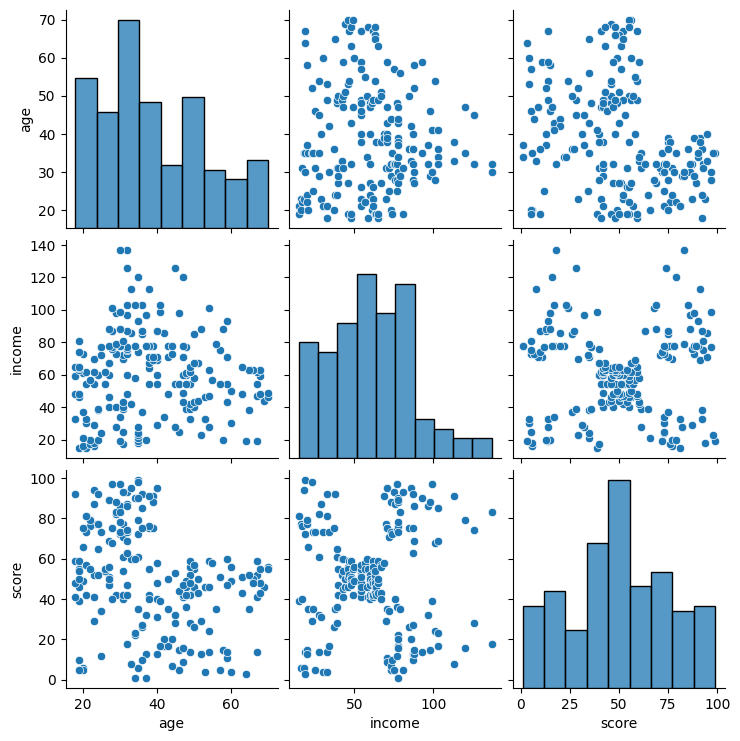

In [ ]:
seaborn.pairplot(df[["age","income","score"]])

In [ ]:
import sklearn.cluster as cluster

In [ ]:
kmeans=cluster.KMeans(n_clusters=5)

In [ ]:
kmeans=kmeans.fit(df[["income","score"]])

In [ ]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [ ]:
df['income_cluster']=kmeans.labels_

In [ ]:
df

,CustomerID,gender,age,income,score,income_cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [ ]:
df['income_cluster'].value_counts()

,count
income_cluster,
2,81
1,39
3,35
4,23
0,22


<Axes: xlabel='income', ylabel='score'>

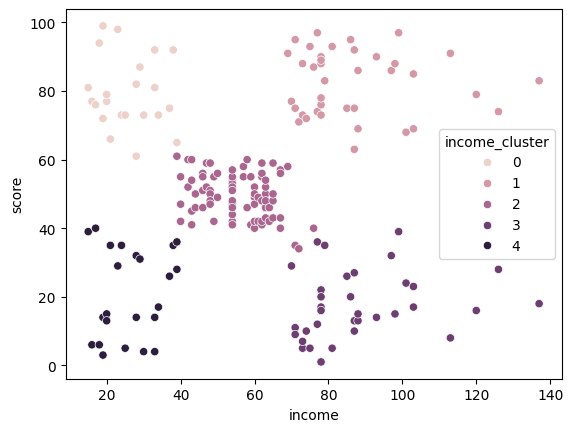

In [ ]:
seaborn.scatterplot(x='income',y='score',hue='income_cluster',data=df)

In [ ]:
kmeans=cluster.KMeans(n_clusters=2)

In [ ]:
kmeans=kmeans.fit(df[["age",'score']])

In [ ]:
kmeans.cluster_centers_

array([[28.95294118, 73.62352941],
       [46.16521739, 32.88695652]])

In [ ]:
df['age_clusters']=kmeans.labels_

In [ ]:
df['age_clusters'].value_counts()

,count
age_clusters,
1,115
0,85


In [ ]:
df

,CustomerID,gender,age,income,score,income_cluster,age_clusters
0,1,Male,19,15,39,4,1
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,4,1
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,4,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0
196,197,Female,45,126,28,3,1
197,198,Male,32,126,74,1,0
198,199,Male,32,137,18,3,1


<Axes: xlabel='age', ylabel='score'>

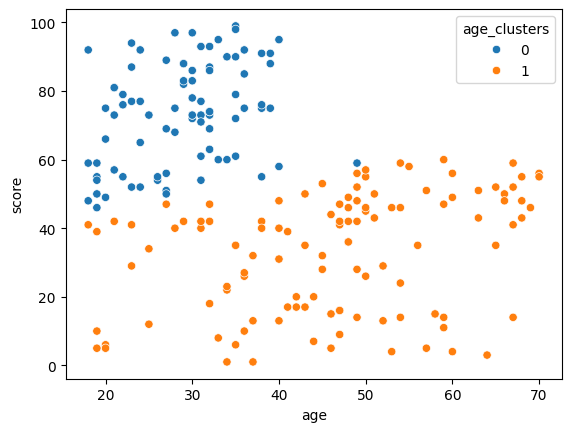

In [ ]:
seaborn.scatterplot(x='age',y='score',hue='age_clusters',data=df)

In [ ]:
k_range=range(1,12)
wcss=[]

In [ ]:
for k in k_range:
  km=cluster.KMeans(n_clusters=k)
  km.fit(df[["income","score"]])
  wcss.append(km.inertia_)

In [ ]:
wcss

[269981.28000000014,
 186362.95600651755,
 132513.89665071768,
 73880.64496247198,
 44448.45544793369,
 37233.81451071002,
 32277.023173884925,
 25311.63315295815,
 21913.929201194416,
 21286.74173280207,
 18828.724253155953]

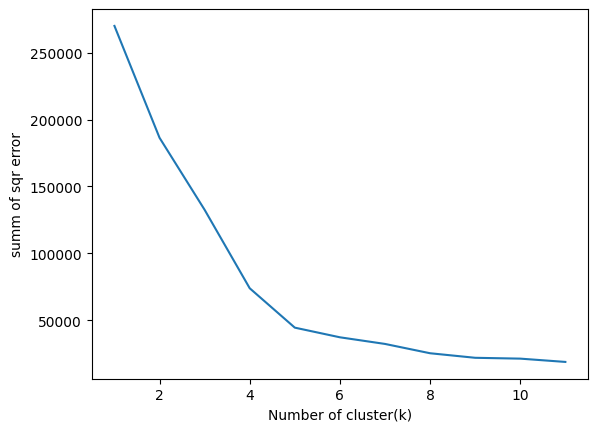

In [ ]:
plt.xlabel("Number of cluster(k)")
plt.ylabel("summ of sqr error")
plt.plot(k_range,wcss)

In [ ]:
k_range=range(1,5)
wcss= []

In [ ]:
for k in k_range:
  km=cluster.KMeans(n_clusters=k)
  km.fit(df[["age","score"]])
  wcss.append(km.inertia_)

In [ ]:
wcss

[171535.50000000003, 75949.15601023012, 45844.53681626927, 28165.583566629342]

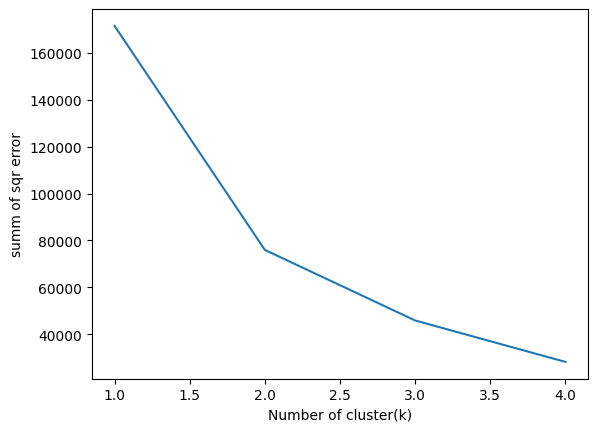

In [ ]:
plt.xlabel("Number of cluster(k)")
plt.ylabel("summ of sqr error")
plt.plot(k_range,wcss)

In [ ]:
from google.colab import files
files.upload()

Saving Kmean_data.csv to Kmean_data.csv


{'Kmean_data.csv': b'petal length (cm),petal width (cm)\n1.4,0.2\n1.4,0.2\n1.3,0.2\n1.5,0.2\n1.4,0.2\n1.7,0.4\n1.4,0.3\n1.5,0.2\n1.4,0.2\n1.5,0.1\n1.5,0.2\n1.6,0.2\n1.4,0.1\n1.1,0.1\n1.2,0.2\n1.5,0.4\n1.3,0.4\n1.4,0.3\n1.7,0.3\n1.5,0.3\n1.7,0.2\n1.5,0.4\n1.0,0.2\n1.7,0.5\n1.9,0.2\n1.6,0.2\n1.6,0.4\n1.5,0.2\n1.4,0.2\n1.6,0.2\n1.6,0.2\n1.5,0.4\n1.5,0.1\n1.4,0.2\n1.5,0.2\n1.2,0.2\n1.3,0.2\n1.4,0.1\n1.3,0.2\n1.5,0.2\n1.3,0.3\n1.3,0.3\n1.3,0.2\n1.6,0.6\n1.9,0.4\n1.4,0.3\n1.6,0.2\n1.4,0.2\n1.5,0.2\n1.4,0.2\n4.7,1.4\n4.5,1.5\n4.9,1.5\n4.0,1.3\n4.6,1.5\n4.5,1.3\n4.7,1.6\n3.3,1.0\n4.6,1.3\n3.9,1.4\n3.5,1.0\n4.2,1.5\n4.0,1.0\n4.7,1.4\n3.6,1.3\n4.4,1.4\n4.5,1.5\n4.1,1.0\n4.5,1.5\n3.9,1.1\n4.8,1.8\n4.0,1.3\n4.9,1.5\n4.7,1.2\n4.3,1.3\n4.4,1.4\n4.8,1.4\n5.0,1.7\n4.5,1.5\n3.5,1.0\n3.8,1.1\n3.7,1.0\n3.9,1.2\n5.1,1.6\n4.5,1.5\n4.5,1.6\n4.7,1.5\n4.4,1.3\n4.1,1.3\n4.0,1.3\n4.4,1.2\n4.6,1.4\n4.0,1.2\n3.3,1.0\n4.2,1.3\n4.2,1.2\n4.2,1.3\n4.3,1.3\n3.0,1.1\n4.1,1.3\n6.0,2.5\n5.1,1.9\n5.9,2.1\n5.6,1.8\n5.8,2.2

In [ ]:
import pandas as pd
df=pd.read_csv("/content/Kmean_data.csv")

In [ ]:
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [ ]:
df.describe()

,petal length (cm),petal width (cm)
count,150.000000,150.000000
mean,3.758000,1.199333
std,1.765298,0.762238
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
km=KMeans(n_clusters=3)
yp=km.fit_predict(df)

In [ ]:
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
df['clusters']=yp

In [ ]:
df

,petal length (cm),petal width (cm),clusters
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [ ]:
df1=df[df.clusters==0]
df2=df[df.clusters==1]
df3=df[df.clusters==2]


In [ ]:
from matplotlib import pyplot as plt

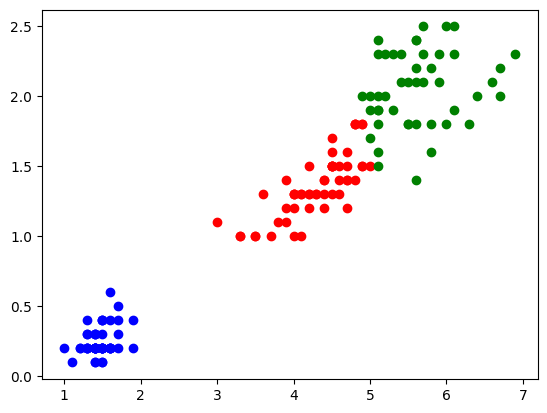

In [ ]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'],color='green')

# Basic function Using Numpy

In [3]:
import numpy as np

def KMeans_init_centroid(X,k):
  return X[np.random.choice(X.shape[0],k,replace=False)]


In [4]:
def find_closest_centroids(X,centroids):
  k=centroids.shape[0]
  idx=np.zeros(X.shape[0],dtype=int)
  for i in range(X.shape[0]):
    distance=[]
    for j in range(centroids.shape[0]):
      norm_ij=np.linalg.norm(X[i]-centroids[j])
      distance.append(norm_ij)
    idx[i]=np.argmin(distance)
  return idx

In [8]:
def compute_centroids(X,idx,k):
  m,n=X.shape
  centroids=np.zeros((k,n))

  for i in range(k):
    points=X[idx==k]
    centroids=np.mean(points,axis=0)

  return centroids

In [9]:
def kmeans(X,k,iterations=100):
  centroids=KMeans_init_centroid(X,k)
  for i in range(iterations):
    idx=find_closest_centroids(X,centroids)
    centroids=compute_centroids(x,idx,k)
  return centroids,idx


# BOOks

In [5]:
import seaborn

In [9]:
import matplotlib.pyplot as  plt
# plt.style.use('seaborn-whitegrid')
import numpy as np
%matplotlib inline


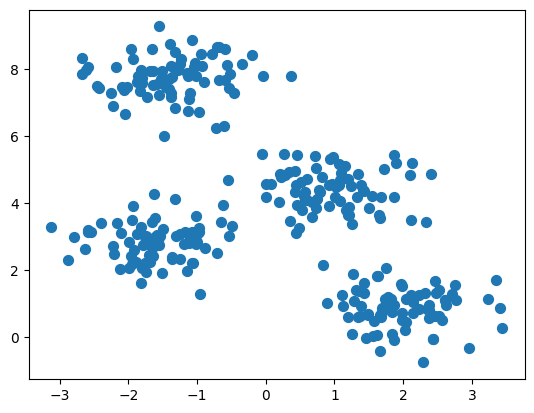

In [10]:
from sklearn.datasets import make_blobs
X,y_true=make_blobs(n_samples=300,centers=4,cluster_std=0.60,random_state=0)
plt.scatter(X[:,0],X[:,1],s=50)

In [11]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans=kmeans.fit_predict(X)

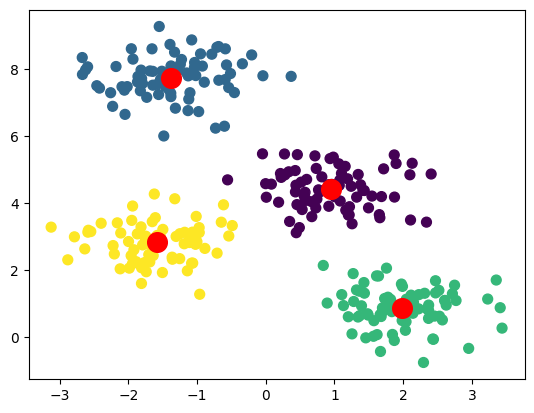

In [14]:
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=50,cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c="red",s=200);